Accuracy: 1.0
Confusion Matrix:
[[20  0]
 [ 0 10]]
Predicted Class for the new data point: Setosa


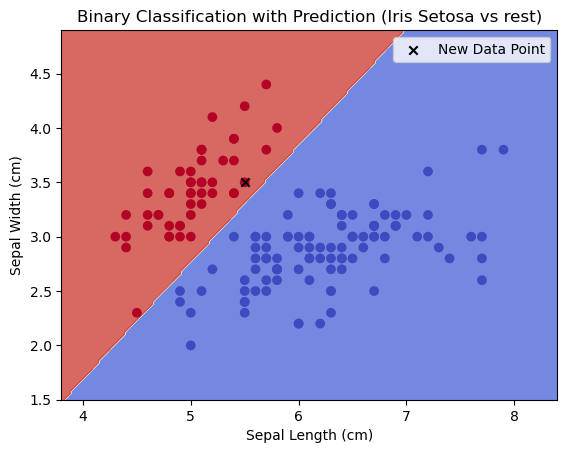

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Using only the first two features for simplicity
y = (iris.target == 0).astype(int)  # Binary classification: Iris Setosa vs rest

# Define class names
class_names = ['Not Setosa', 'Setosa']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Prediction example
# Let's create a new data point for prediction
new_data_point = np.array([[5.5, 3.5]])  # Example data point for prediction

# Predicting the class of the new data point
predicted_class = model.predict(new_data_point)[0]
predicted_class_name = class_names[predicted_class]
print("Predicted Class for the new data point:", predicted_class_name)

# Visualizing the decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(new_data_point[:, 0], new_data_point[:, 1], color='black', marker='x', label='New Data Point')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Binary Classification with Prediction (Iris Setosa vs rest)')
plt.legend()
plt.show()
